## Quiz #0402

### "OLS solution"

In [82]:
import numpy as np
import pandas as pd

#### Answer the following question by providing Python code:
<br>
study = an array that contains the hours of study. This is the explanatory variable. <br>
score = an array that contains the test scores. This is the response variable.

In [83]:
study = np.array([ 3, 4.5, 6, 1.2, 2, 6.9, 6.7, 5.5]).reshape(-1,1)
score = np.array([ 88, 85, 90, 80, 81, 92, 95, 90]).reshape(-1,1)

1). Define the 'linerRegression' class to match the output shown below:

In [84]:
class linearRegression:
  
  def __init__(self):
    
    self.R2 = None
    self.summary = None
    self.beta = None
    self.residuals = None 
      
  def train(self, input_X, input_Y):
      n = input_X.shape[0]                                      # Number of observations.
      k = input_X.shape[1]                                      # Number of explanatory variables.

      # adding intercept term to input_X
      intercept = np.ones((n,1))
      
      X = np.concatenate((intercept, input_X), axis=1)
      Y = input_Y
      
      # Regression Coefficients by OLS.
      self.beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
      
      # Residuals.
      self.residuals = Y - np.dot(X,self.beta)
        
      # R^2.
      self.R2 = 1 - np.sum(self.residuals**2)/np.sum((Y-np.mean(Y))**2) 
      
      # Summary.
      index = ['Intercept'] + ['X'+str(i) for i in range(1,k+1)]
      self.summary = pd.DataFrame( self.beta.T.flat, index = index, columns=['Coefficient'] )



  def output(self):
    print(self.summary)
    print("------------------------------")
    print("R^2 :", np.round(self.R2, 6))

**Sample run:**

In [85]:
LR = linearRegression()                    # Create a linear regression object.
LR.train(study, score)                     # Train.
LR.output()                                # Display the training result.

           Coefficient
Intercept    77.684670
X1            2.221303
------------------------------
R^2 : 0.845842


# Plot

Text(0, 0.5, 'score')

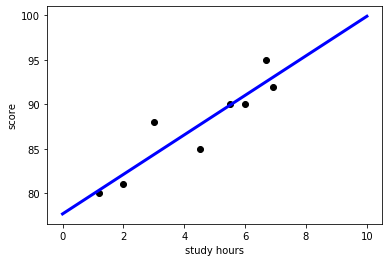

In [128]:
import matplotlib.pyplot as plt
import pandas as pd



b, a = list(LR.beta.T.flat)

x = np.linspace(0,10,100)
y = a * x + b

data={}
data['score'] = list(score.flat)
data['study'] = list(study.flat)

df = pd.DataFrame(data, columns=['score', 'study', 'y'])
df.sort_values(by='study', inplace=True)

plt.scatter(df.study, df.score, color='black')
plt.plot(x, y, color='blue', linewidth=3)
plt.xlabel('study hours')
plt.ylabel('score')
